In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append( './helper' )
import helper

In [2]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


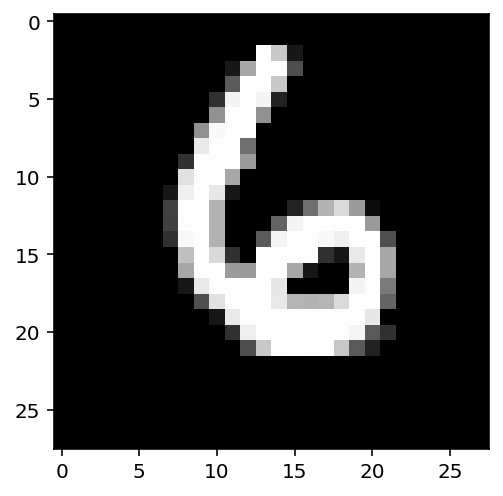

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [6]:
from torch import nn

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [7]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        ...,
        [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036]])


In [8]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0290,  0.0122,  0.0277,  ..., -0.0237, -0.0211,  0.0325],
        [-0.0088,  0.0088, -0.0186,  ...,  0.0222,  0.0099, -0.0252],
        [ 0.0001,  0.0136, -0.0199,  ..., -0.0307,  0.0202,  0.0016],
        ...,
        [ 0.0102,  0.0292,  0.0068,  ..., -0.0054, -0.0069,  0.0090],
        [ 0.0271, -0.0294, -0.0140,  ..., -0.0117, -0.0234,  0.0351],
        [ 0.0030, -0.0335, -0.0238,  ...,  0.0140, -0.0001, -0.0129]],
       requires_grad=True)
Gradient - tensor([[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        ...,
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019]])


In [10]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 2.9035e-02,  1.2237e-02,  2.7670e-02,  ..., -2.3660e-02,
         -2.1149e-02,  3.2446e-02],
        [-8.7540e-03,  8.8533e-03, -1.8551e-02,  ...,  2.2215e-02,
          9.9473e-03, -2.5137e-02],
        [ 1.3681e-04,  1.3644e-02, -1.9845e-02,  ..., -3.0648e-02,
          2.0255e-02,  1.6166e-03],
        ...,
        [ 1.0213e-02,  2.9202e-02,  6.7506e-03,  ..., -5.3986e-03,
         -6.9551e-03,  8.9508e-03],
        [ 2.7066e-02, -2.9419e-02, -1.4016e-02,  ..., -1.1685e-02,
         -2.3411e-02,  3.5079e-02],
        [ 2.9692e-03, -3.3509e-02, -2.3817e-02,  ...,  1.4001e-02,
         -9.2185e-05, -1.2909e-02]], requires_grad=True)


In [11]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8255503398777326
Training loss: 0.8068266124295782
Training loss: 0.5127151177000644
Training loss: 0.42478430217135943
Training loss: 0.38315618476633834


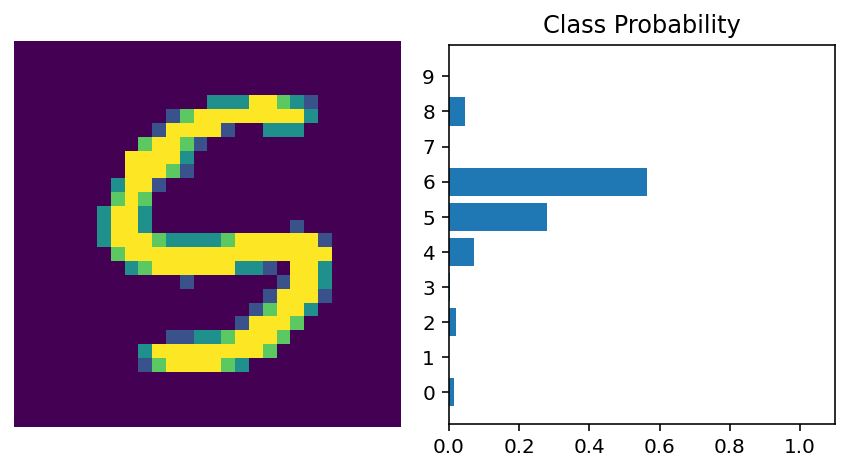

In [38]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)